In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import numpy as np
import pysan

import os

In [2]:
path = os.path.abspath(os.path.join(os.getcwd(), os.path.pardir))

In [3]:
df = pd.read_csv(os.path.join(path, "data/ml_data.csv"), index_col=0)

In [4]:
top_five_teams_by_games = df.groupby('Club_Name').count().sort_values(by='Match_id', ascending=False).iloc[:5, :1]

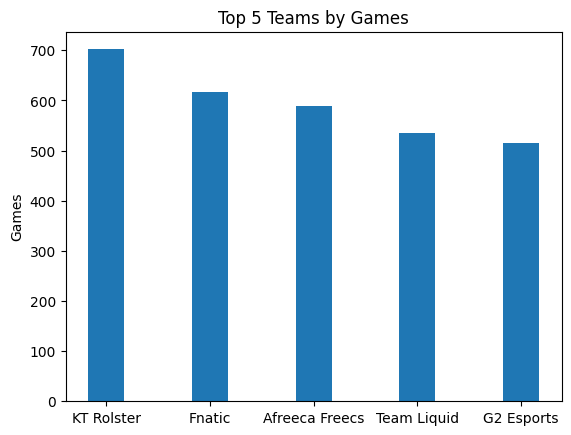

In [5]:
width = 0.35 
fig, ax = plt.subplots()

teams = top_five_teams_by_games.index.to_list()
counts = top_five_teams_by_games['Result'].to_list()

ax.bar(teams, counts, width)

ax.set_ylabel('Games')
ax.set_title('Top 5 Teams by Games')

plt.show()

In [6]:
def calculate_win_ratio(df: pd.DataFrame, club_names: list) -> dict:
    df_count = df.groupby(['Club_Name', 'Result']).count().iloc[:, 0:1]
    club_win_ratio = {}
    for name in club_names:
        win_ratio = (df_count.loc[name, 'WIN'][0] / df_count.loc[name].sum()[0])
        loss_ratio = (df_count.loc[name, 'LOSS'][0] / df_count.loc[name].sum()[0])
        club_win_ratio[name] = [win_ratio * 100, loss_ratio * 100]
        
    return club_win_ratio

In [7]:
club_win_ratio = calculate_win_ratio(df, teams)

In [8]:
def survey(results: dict, category_names: list) -> tuple:
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.85, 0.15, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax

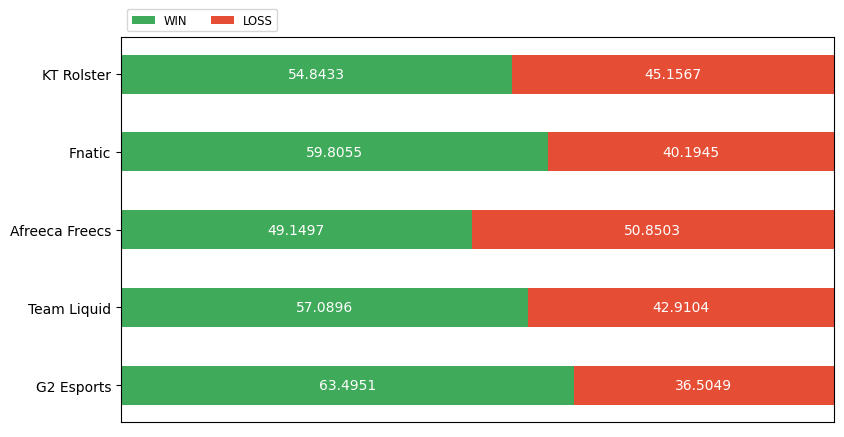

In [22]:
category_names = ['WIN', 'LOSS']
survey(club_win_ratio, category_names)
plt.show()

In [54]:
first = pysan.get_element_counts(list(df[f'Pick_1']))
for i in range(1, 5):
    champs = pysan.get_element_counts(list(df[f'Pick_{i}']))
    for k in list(champs.keys()):
        try:
            first[k] = first[k] + champs[k]
        except:
            continue

In [66]:
most_picked_champs = pd.DataFrame([first.values(), first.keys()]).T

In [68]:
most_picked_champs.columns = ['Games', 'Champion']

In [122]:
most_picked_champs.sort_values(by='Games', ascending=False).reset_index(drop=True)[0:10]

,Games,Champion
0,8998,Gnar
1,8622,Renekton
2,7596,Ornn
3,6701,Ezreal
4,6665,Camille
5,6514,Lee
6,6386,Gragas
7,6205,Aatrox
8,5624,Jayce
9,5435,Gangplank


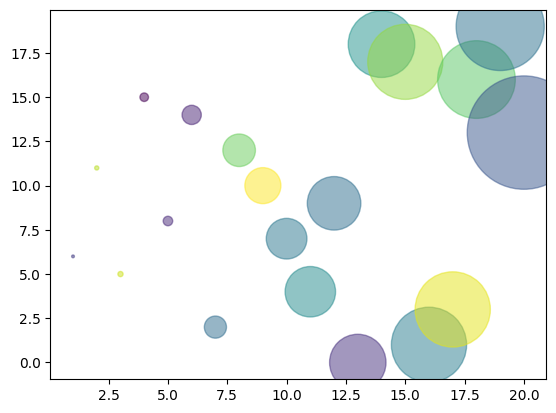

In [119]:
area = most_picked_champs[:20]['Games'].sort_values().to_list()
x = list(range(1, 21))
y = most_picked_champs[:20]['Games'].sort_values().reset_index()['index'].to_list()
colors = np.random.rand(20)
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

In [111]:
x

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [30]:
get_element_frequency(list(df['Ban_1']))

{'Varus': 0.022207821776976024,
 'Qiyana': 0.0033276704555405714,
 'Talon': 0.0029073331348407096,
 'Jax': 0.0016988633378286074,
 'Morgana': 0.004816365133019248,
 'Aphelios': 0.011033854668371368,
 'Riven': 0.0015237227875369984,
 'Anivia': 0.001961574163266021,
 'Jarvan': 0.00602483493003135,
 'Yuumi': 0.008792055624638773,
 'Sylas': 0.0038355780513862374,
 'Shen': 0.008721999404522129,
 'Nasus': 8.757027514580451e-05,
 'Taliyah': 0.014291468903795295,
 'Fiddlesticks': 0.0011909557419829413,
 'Lillia': 0.005009019738340018,
 'Singed': 0.00017514055029160903,
 'Twisted': 0.020701613044468187,
 'Akshan': 0.0012084697970121021,
 'Master': 0.0004903935408165053,
 'Maokai': 0.0017514055029160902,
 'Jayce': 0.01416887051859117,
 'Soraka': 0.0019090319981785384,
 'Vladimir': 0.008073979368443175,
 'Renekton': 0.018021962625006566,
 'Azir': 0.014694292169465996,
 'Malzahar': 0.005569469499273167,
 'Brand': 0.00033276704555405714,
 'Viego': 0.0077236982678599575,
 'Taric': 0.0015587508975953

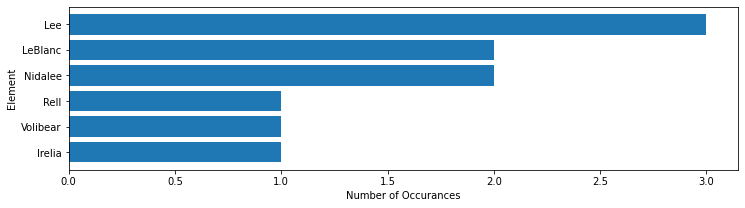

In [32]:
plt = plot_element_counts(list(df['Ban_1'][:10]))
plt.show()

In [38]:
from pysan import get_subsequences, get_ndistinct_subsequences

In [67]:
from pysan.ngrams import get_unique_ngrams, get_all_ngrams, get_ngram_universe, get_ngram_counts, plot_ngram_counts

In [36]:
get_subsequences(df['Ban_1'][:10])

[['Irelia'],
 ['Volibear'],
 ['LeBlanc'],
 ['LeBlanc'],
 ['Nidalee'],
 ['Nidalee'],
 ['Rell'],
 ['Lee'],
 ['Lee'],
 ['Lee'],
 ['Irelia', 'Volibear'],
 ['Irelia', 'LeBlanc'],
 ['Irelia', 'LeBlanc'],
 ['Irelia', 'Nidalee'],
 ['Irelia', 'Nidalee'],
 ['Irelia', 'Rell'],
 ['Irelia', 'Lee'],
 ['Irelia', 'Lee'],
 ['Irelia', 'Lee'],
 ['Volibear', 'LeBlanc'],
 ['Volibear', 'LeBlanc'],
 ['Volibear', 'Nidalee'],
 ['Volibear', 'Nidalee'],
 ['Volibear', 'Rell'],
 ['Volibear', 'Lee'],
 ['Volibear', 'Lee'],
 ['Volibear', 'Lee'],
 ['LeBlanc', 'LeBlanc'],
 ['LeBlanc', 'Nidalee'],
 ['LeBlanc', 'Nidalee'],
 ['LeBlanc', 'Rell'],
 ['LeBlanc', 'Lee'],
 ['LeBlanc', 'Lee'],
 ['LeBlanc', 'Lee'],
 ['LeBlanc', 'Nidalee'],
 ['LeBlanc', 'Nidalee'],
 ['LeBlanc', 'Rell'],
 ['LeBlanc', 'Lee'],
 ['LeBlanc', 'Lee'],
 ['LeBlanc', 'Lee'],
 ['Nidalee', 'Nidalee'],
 ['Nidalee', 'Rell'],
 ['Nidalee', 'Lee'],
 ['Nidalee', 'Lee'],
 ['Nidalee', 'Lee'],
 ['Nidalee', 'Rell'],
 ['Nidalee', 'Lee'],
 ['Nidalee', 'Lee'],
 ['Nidalee'

In [77]:
get_unique_ngrams(list(df['Ban_1']), 3)

[['Irelia', 'Volibear', 'LeBlanc'],
 ['Volibear', 'LeBlanc', 'LeBlanc'],
 ['LeBlanc', 'LeBlanc', 'Nidalee'],
 ['LeBlanc', 'Nidalee', 'Nidalee'],
 ['Nidalee', 'Nidalee', 'Rell'],
 ['Nidalee', 'Rell', 'Lee'],
 ['Rell', 'Lee', 'Lee'],
 ['Lee', 'Lee', 'Lee'],
 ['Lee', 'Lee', 'Hecarim'],
 ['Lee', 'Hecarim', 'Zeri'],
 ['Hecarim', 'Zeri', 'Zeri'],
 ['Zeri', 'Zeri', 'Graves'],
 ['Zeri', 'Graves', 'Azir'],
 ['Graves', 'Azir', 'Graves'],
 ['Azir', 'Graves', 'Azir'],
 ['Azir', 'Graves', 'Rell'],
 ['Graves', 'Rell', 'Veigar'],
 ['Rell', 'Veigar', 'Galio'],
 ['Veigar', 'Galio', 'Akshan'],
 ['Galio', 'Akshan', 'Karma'],
 ['Akshan', 'Karma', 'Cassiopeia'],
 ['Karma', 'Cassiopeia', 'Nocturne'],
 ['Cassiopeia', 'Nocturne', 'Diana'],
 ['Nocturne', 'Diana', 'Zeri'],
 ['Diana', 'Zeri', 'Twisted'],
 ['Zeri', 'Twisted', 'Tryndamere'],
 ['Twisted', 'Tryndamere', 'Caitlyn'],
 ['Tryndamere', 'Caitlyn', 'Lee'],
 ['Caitlyn', 'Lee', 'Kaisa'],
 ['Lee', 'Kaisa', 'Zoe'],
 ['Kaisa', 'Zoe', 'Ryze'],
 ['Zoe', 'Ryze', '

In [56]:
get_all_ngrams(df['Ban_1'], 3)

[0      Irelia
 1    Volibear
 2     LeBlanc
 Name: Ban_1, dtype: object,
 1    Volibear
 2     LeBlanc
 3     LeBlanc
 Name: Ban_1, dtype: object,
 2    LeBlanc
 3    LeBlanc
 4    Nidalee
 Name: Ban_1, dtype: object,
 3    LeBlanc
 4    Nidalee
 5    Nidalee
 Name: Ban_1, dtype: object,
 4    Nidalee
 5    Nidalee
 6       Rell
 Name: Ban_1, dtype: object,
 5    Nidalee
 6       Rell
 7        Lee
 Name: Ban_1, dtype: object,
 6    Rell
 7     Lee
 8     Lee
 Name: Ban_1, dtype: object,
 7    Lee
 8    Lee
 9    Lee
 Name: Ban_1, dtype: object,
 8         Lee
 9         Lee
 10    Hecarim
 Name: Ban_1, dtype: object,
 9         Lee
 10    Hecarim
 11       Zeri
 Name: Ban_1, dtype: object,
 10    Hecarim
 11       Zeri
 12       Zeri
 Name: Ban_1, dtype: object,
 11      Zeri
 12      Zeri
 13    Graves
 Name: Ban_1, dtype: object,
 12      Zeri
 13    Graves
 14      Azir
 Name: Ban_1, dtype: object,
 13    Graves
 14      Azir
 15    Graves
 Name: Ban_1, dtype: object,
 14      Azi

In [58]:
get_ngram_universe(df['Ban_1'], 3)

4096000

In [73]:
get_ngram_counts(list(df['Ban_1']), 3)

{"['Irelia', 'Volibear', 'LeBlanc']": 1,
 "['Volibear', 'LeBlanc', 'LeBlanc']": 2,
 "['LeBlanc', 'LeBlanc', 'Nidalee']": 6,
 "['LeBlanc', 'Nidalee', 'Nidalee']": 4,
 "['Nidalee', 'Nidalee', 'Rell']": 1,
 "['Nidalee', 'Rell', 'Lee']": 1,
 "['Rell', 'Lee', 'Lee']": 1,
 "['Lee', 'Lee', 'Lee']": 28,
 "['Lee', 'Lee', 'Hecarim']": 1,
 "['Lee', 'Hecarim', 'Zeri']": 2,
 "['Hecarim', 'Zeri', 'Zeri']": 2,
 "['Zeri', 'Zeri', 'Graves']": 4,
 "['Zeri', 'Graves', 'Azir']": 1,
 "['Graves', 'Azir', 'Graves']": 2,
 "['Azir', 'Graves', 'Azir']": 2,
 "['Azir', 'Graves', 'Rell']": 1,
 "['Graves', 'Rell', 'Veigar']": 1,
 "['Rell', 'Veigar', 'Galio']": 1,
 "['Veigar', 'Galio', 'Akshan']": 1,
 "['Galio', 'Akshan', 'Karma']": 1,
 "['Akshan', 'Karma', 'Cassiopeia']": 1,
 "['Karma', 'Cassiopeia', 'Nocturne']": 1,
 "['Cassiopeia', 'Nocturne', 'Diana']": 1,
 "['Nocturne', 'Diana', 'Zeri']": 1,
 "['Diana', 'Zeri', 'Twisted']": 1,
 "['Zeri', 'Twisted', 'Tryndamere']": 2,
 "['Twisted', 'Tryndamere', 'Caitlyn']": 1,


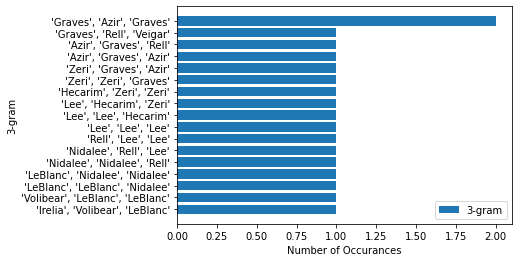

In [76]:
plt = plot_ngram_counts(list(df['Ban_1'][:20]), 3)
plt.show()